# Laboratorio No. 3
- Ricardo Méndez 21289
- Sara Echeverría 21371
- Francisco Castillo 21562

Enlace al repositorio: [https://github.com/FranzCastillo/IA-Perceptron-Feature-Gradient](https://github.com/FranzCastillo/IA-Perceptron-Feature-Gradient)

# Task No. 1 Preguntas teóricas

### 1.1 Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

### 1.2 Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada.

## Feature extraction
Esta implica transformar las características originales en un conjunto más informativo y compacto. 

![pic](https://miro.medium.com/v2/resize:fit:828/format:webp/0*bRNjQuiiMxnh3JpP.png)

Los métodos lineales como el Análisis de Componentes Principales (PCA) y no lineales como el Autoencoder son ejemplos. PCA identifica componentes principales que explican la máxima varianza, mientras que Autoencoder utiliza una red neuronal para comprimir datos. Un ejemplo práctico es el método de Coeficientes Cepstrales de Mel-Frecuencia (MFCC) para extraer características de señales de audio en reconocimiento de voz.

## Feature selection
Esta consiste en elegir un subconjunto relevante de características originales para mejorar el rendimiento del modelo.

![pic](https://miro.medium.com/v2/resize:fit:828/format:webp/1*CHnUGGi0rPzwyUlT0pphcw.png)

Los métodos de filtro, como la Selección Univariable de Características con el valor F de ANOVA, clasifican y seleccionan características. La Eliminación Recursiva de Características (RFE) es un método de envoltura que selecciona características importantes mediante la eliminación recursiva de las menos importantes. 

(GeeksforGeeks, 2023; Gomede, 2023; Shah, 2021)

### Referencias
- GeeksforGeeks. (2023). Difference between feature selection and feature extraction. https://www.geeksforgeeks.org/difference-between-feature-selection-and-feature-extraction/
- Gomede. (2023). Feature Engineering for Computer Vision - Everton Gomede, PhD - medium. Medium. https://medium.com/@evertongomede/feature-engineering-for-computer-vision-f01a76d8058c
- Shah. (2021). Feature Selection Techniques - DataDrivenInvestor. Medium. https://medium.datadriveninvestor.com/feature-selection-techniques-1a99e61da222

### 1.3 Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

Un perceptrón de una sola capa es, como indican las instrucciones, un tipo de red neuronal simple; este solo puede aprender funciones lineales separables. Es conformado por una capa de entrada, una capa de procesamiento y una función de activación. El proceso de aprendizaje consiste en "alimentar" al perceptrón con varias observaciones, calcular la salida de cada una y ajustar los pesos para minimizar el error de salida.

La manera en la que actualiza sus parámetros es a través de la regla de aprendizaje, la cual se basa en el error de salida. Si el error es positivo, se aumenta el peso; si el error es negativo, se disminuye el peso. Este proceso se repite hasta que el error sea mínimo.

**Referencias**
[Perceptrón: ¿qué es y para qué sirve?](https://datascientest.com/es/perceptron-que-es-y-para-que-sirve)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Task No. 2.1 Gradiente descendiente estocástico

In [73]:
import random
import time

values = [random.uniform(-1000, 1000) for _ in range(100)]
SGD_values = values.copy()
mini_values = values.copy()

max = np.max(values)
min = np.min(values)

GD_arr, SGD_arr, SGD_minib_arr = [],[],[]


In [74]:
#GD
start = time.time() * 1000
for val in values:
    GD_arr.append(np.polyval([2,3,5,3],val))
end = time.time() * 1000
time.sleep(1)
GD_time = end - start

In [75]:
#SGD
sgd_used_val = []
start = time.time() * 1000
for _ in range(20):
    id = random.randint(0,len(SGD_values)-1)
    val = SGD_values.pop(id)
    sgd_used_val.append(val)
    SGD_arr.append(np.polyval([2,3,5,3],val))
end = time.time() * 1000
time.sleep(1)
SGD_time = end - start

In [76]:
#SGD mini batch
start = time.time() * 1000
val = []
mini_used_val = []
for _ in range(20):
    for _ in range(3):
        id = random.randint(0,len(mini_values)-1)
        val.append(mini_values.pop(id))
    mini_used_val.append(val[0])
    mini_used_val.append(val[1])  
    mini_used_val.append(val[2])      
    SGD_minib_arr.append(np.polyval([2,3,5,3],val.pop()))
    SGD_minib_arr.append(np.polyval([2,3,5,3],val.pop()))
    SGD_minib_arr.append(np.polyval([2,3,5,3],val.pop()))
end = time.time() * 1000
time.sleep(1)
mini_time = end - start

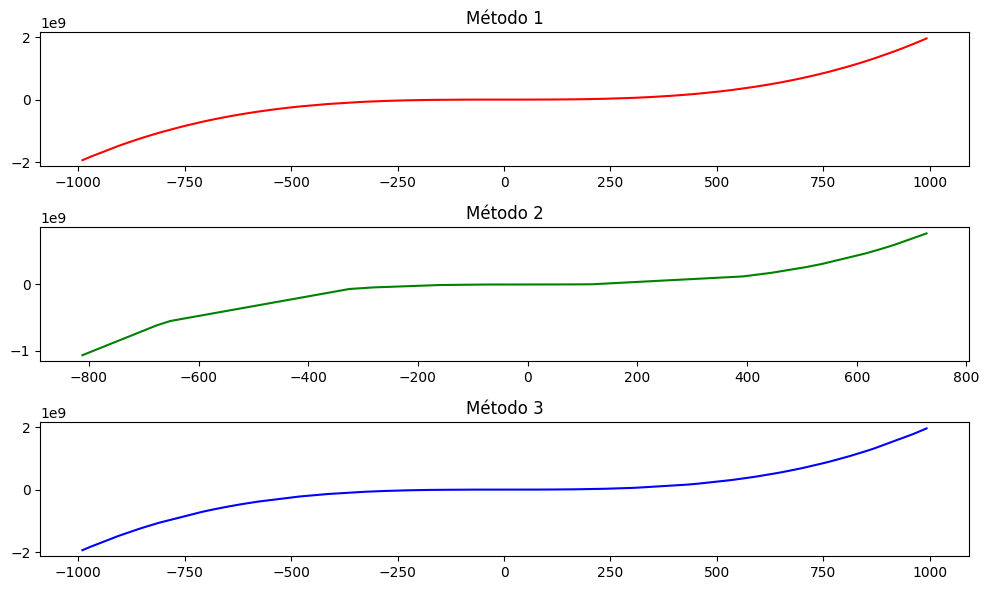

In [77]:
plt.figure(figsize=(10, 6))


values.sort()
GD_arr.sort()
sgd_used_val.sort()
SGD_arr.sort()
mini_used_val.sort()
SGD_minib_arr.sort()

plt.subplot(311)
plt.plot(values, GD_arr, 'r')
plt.title('Método 1')

plt.subplot(312)
plt.plot(sgd_used_val, SGD_arr, 'g')  
plt.title('Método 2')

plt.subplot(313)
plt.plot(mini_used_val, SGD_minib_arr, 'b')  
plt.title('Método 3')

plt.tight_layout()
plt.show()

In [81]:
gd_poly = np.poly1d(np.polyfit(values, GD_arr, 3))
sgd_poly = np.poly1d(np.polyfit(sgd_used_val, SGD_arr, 3))
mini_poly = np.poly1d(np.polyfit(mini_used_val, SGD_minib_arr, 3))

gd_score = 0
sgd_score = 0
mini_score = 0


for x in values:
    gd_score += (np.polyval([2,3,5,3],x) - gd_poly(x))**2
    sgd_score += (np.polyval([2,3,5,3],x) - sgd_poly(x))**2
    mini_score += (np.polyval([2,3,5,3],x) - mini_poly(x))**2

print("GD MSE: " + str(gd_score/len(values)) + "\n Time: " + str(GD_time)+"ms")
print("\nSGD MSE: " + str(sgd_score/len(values))+ "\n Time: " + str(SGD_time)+"ms")
print("\nMINI BATCH MSE: " + str(mini_score/len(values))+ "\n Time: " + str(mini_time)+"ms")

GD MSE: 9.520799923971302e-15
 Time: 1.984130859375
ms
SGD MSE: 7.299266254421569e-14
 Time: 0.0
ms
MINI BATCH MSE: 1.0479198577685389e-13
 Time: 1.001708984375ms


# Task No. 2.2 Feature selection

### Análisis explroatorio en laboratorio No. 2

In [20]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE

In [21]:
scaler = StandardScaler()
df_lol = pd.read_csv('data/high_diamond_ranked_10min.csv')
df_lol.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [22]:
df_lol['blueWins'].value_counts(normalize=True)

0    0.500962
1    0.499038
Name: blueWins, dtype: float64

In [23]:
features_lol = df_lol.drop(columns=['blueWins', 'gameId'])
target_lol = df_lol['blueWins']

In [24]:
# scalation
features_lol = pd.DataFrame(scaler.fit_transform(features_lol), columns=features_lol.columns)

In [25]:
X_train_lol, X_test_lol, y_train_lol, y_test_lol = train_test_split(features_lol, target_lol, test_size=0.2, random_state=7)

### Aplicación de técnicas de feature selection e implementación de SVM

In [26]:
def train_svm(X_train, y_train, X_test, y_test):
    svm = SVC(kernel='linear', probability=True)
    svm.fit(X_train, y_train)
    return svm

In [27]:
# anova f-statistic
selector_anova = SelectKBest(f_classif, k=10)
X_train_anova = selector_anova.fit_transform(X_train_lol, y_train_lol)
X_test_anova = selector_anova.transform(X_test_lol)
svm_anova = train_svm(X_train_anova, y_train_lol, X_test_anova, y_test_lol)

In [28]:
# recursive feature elimination
selector_rfe = RFE(estimator=SVC(kernel='linear'), n_features_to_select=10)
X_train_rfe = selector_rfe.fit_transform(X_train_lol, y_train_lol)
X_test_rfe = selector_rfe.transform(X_test_lol)
svm_rfe = train_svm(X_train_rfe, y_train_lol, X_test_rfe, y_test_lol)

In [29]:
# random forest
important_features = ['blueKills', 'blueGoldDiff', 'redGoldDiff', 'blueExperienceDiff', 'redExperienceDiff',
                       'blueGoldPerMin', 'redGoldPerMin', 'blueCSPerMin', 'redCSPerMin', 'blueAvgLevel']
X_train_rf = X_train_lol[important_features]
X_test_rf = X_test_lol[important_features]
svm_rf = train_svm(X_train_rf, y_train_lol, X_test_rf, y_test_lol)

In [30]:
# svm without features selection
model = svm.SVC(kernel='rbf', class_weight={-1:1, 1:10})
y_training = np.where(y_train_lol.values <= 0, -1, 1)
model.fit(X_train_lol.values, y_training)
y_pred = model.predict(X_test_lol.values)
y_true = np.where(y_test_lol.values <= 0, -1, 1)

### Comparación y métricas de desempeño

In [31]:
# find accuracy of each model
accuracy_svm = accuracy_score(y_true, y_pred)
accuracy_anova = accuracy_score(y_test_lol, svm_anova.predict(X_test_anova))
accuracy_rfe = accuracy_score(y_test_lol, svm_rfe.predict(X_test_rfe))
accuracy_rf = accuracy_score(y_test_lol, svm_rf.predict(X_test_rf))

# comparison using accuracy
print(" --- comparison using accuracy --- ")
print("SVM without features selection:", round(accuracy_svm, 4))
print("ANOVA:", round(accuracy_anova, 4))
print("Random Forest:", round(accuracy_rf, 4))
print("Recursive Feature Elimination (RFE):", round(accuracy_rfe, 4))

# best version according to accuracy
best_version_accuracy = max([(accuracy_svm, 'SVM')])
all_versions_accuracy = [(accuracy_anova, 'ANOVA'), (accuracy_rfe, 'RFE'), (accuracy_rf, 'Random Forest')]
best_version_accuracy = max(all_versions_accuracy + [best_version_accuracy])

print("")
print(f"La mejor versión según la métrica de precisión es {best_version_accuracy[1]} con accuracy de {round(best_version_accuracy[0], 4)}.")

 --- comparison using accuracy --- 
SVM without features selection: 0.5901
ANOVA: 0.7257
Random Forest: 0.7272
Recursive Feature Elimination (RFE): 0.7282

La mejor versión según la métrica de precisión es RFE con accuracy de 0.7282.


### ¿Por qué accuracy?
En este escenario, la elección de la precisión como métrica de desempeño es apropiada debido a la falta de desequilibrios en las clases del conjunto de datos. La accuracy que mide la proporción de predicciones correctas sobre el total de predicciones, es fiable en situaciones de clases balanceadas.

### ¿Cuál fué la mejor versión?
Los resultados indican que Recursive Feature Elimination (RFE) logra la mayor precisión, alcanzando un valor de 0.7282. Esto sugiere que esta técnica identifica de manera efectiva las características más relevantes para mejorar el rendimiento del modelo SVM. Esta, al eliminar iterativamente las características menos importantes, optimiza la capacidad predictiva del modelo. Por lo tanto, la selección de características mediante RFE parece ser la elección más acertada para este conjunto de datos en términos de accuracy.

# Task No. 2.3 Perceptrón

In [32]:
# Load Iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [33]:
def unit_step(x):
    """ Heaviside Step function. v must be a scalar or a numpy array. """
    threshold = 0
    versicolor = 0
    virginica = 1
    return np.where(x > threshold, virginica, versicolor)

In [34]:
class Perceptron:
    """
    Perceptron classifier.
    Reference: https://www.youtube.com/watch?v=aOEoxyA4uXU
    """
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.random.rand(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iters):
            for i, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.learning_rate * (y[i] - y_predicted)
                self.weights += update * x_i
                self.bias += update
        
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [35]:
iris = load_iris()
print(iris.keys())

# Print the names of the four features and the values
print(iris.feature_names)

# Print the names of the three target classes 
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [36]:
X = iris.data
y = iris.target

# Drop setosa
X = X[y != 0]
y = y[y != 0]

# Keep sepal length and sepal width as the features in the X matrix
X_sepal_length = X[:, 0]
X_sepal_width = X[:, 1]

X = np.array(list(zip(X_sepal_length, X_sepal_width)))

# Binarize the target
y = np.where(y == 1, 0, 1) # Versicolor is 0, Virginica is 1

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21562)

In [38]:
# Train the perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

In [39]:
# Make predictions
y_pred = perceptron.predict(X_test)

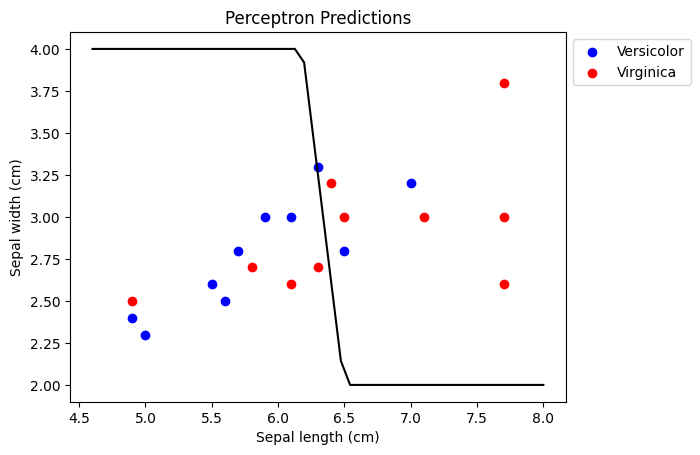

In [40]:
# Plot the decision boundary
x1 = np.linspace(4.6, 8, 50)
x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]

# Limit the decision boundary to the range of the sepal width
x2 = np.clip(x2, 2, 4)
plt.plot(x1, x2, 'k')

# Plot predictions
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='b', label='Versicolor')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='r', label='Virginica')


plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Perceptron Predictions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[7, 3],
       [4, 6]], dtype=int64)

In [42]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.65      0.65      0.65        20
weighted avg       0.65      0.65      0.65        20



In [43]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.65


Se ha escogido para evaluar el perceptrón el _accuracy_ debido a que es un problema de clasificación binaria. El _accuracy_ es una métrica adecuada para evaluar la precisión de un modelo en donde es necesario tener en cuenta tanto los verdaderos positivos como los verdaderos negativos. 

En este caso, el _accuracy_ obtenido es de 0.65. No es un valor ideal, pero es un buen punto de partida para mejorar el modelo. Al haber tomado solamente 2 _features_ de los disponibles en el conjunto de datos, es posible que el modelo no esté capturando toda la información necesaria para hacer predicciones más precisas. Además, es necesario tomar en cuenta que las que han sido escogidas (Sepal width y Sepal length) no son las que mejor separan las clases, pues se pueden observar puntos de una clase en el área de la otra. 